In [71]:
# import modules
import importlib
from pypet import Environment, Parameter, cartesian_product, progressbar, Trajectory
import numpy as np
import csv
import os
import copy
import pickle
import logging
from datetime import date
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
import scipy
from fitnessinference import simulation as simu
from fitnessinference import analysis as ana

In [9]:
# run this to reload a module after editing it 
# (instead of restarting the whole notebook kernel):
importlib.reload(ana)

<module 'fitnessinference.analysis' from 'C:\\Users\\julia\\Documents\\Resources\\InfluenzaFitnessLandscape\\NewApproachFromMarch2021\\InfluenzaFitnessInference\\code\\notebooks\\fitnessinference\\analysis.py'>

In [67]:
# run analysis for all simus

# make sure that file path is in norm path format:
result_directory = os.path.normpath(result_directory)
# load parameters from the pypet file
simu_file = os.path.join(result_directory, 'results', 'simulations', simu_name + '.hdf5')
# only need trajectory, not environment to look at parameters and results:
traj = Trajectory(simu_name, add_time=False)
# load the trajectory from the file with only parameters but not results loaded
traj.f_load(filename=simu_file, load_parameters=2,
            load_results=2, load_derived_parameters=0)

# get list of value list of first param and calculate the number of simus
for key in exp_dict:
    val0 = exp_dict[key]
    num_simus = len(val0)
    break

summary_stats_all = {
        'r_h': [],
        'pr_h': [],
        'SE_r_h': [],
        'r_J': [],
        'pr_J': [],
        'SE_r_J': [],
        'r_hJ': [],
        'pr_hJ': [],
        'SE_r_hJ': [],
        'rho_h': [],
        'prho_h': [],
        'SE_rho_h': [],
        'rho_J': [],
        'prho_J': [],
        'SE_rho_J': [],
        'rho_hJ': [],
        'prho_hJ': [],
        'SE_rho_hJ': []
    }    

# loop over each run and do analysis
for exp_idx in range(num_simus):
    traj.v_idx = exp_idx
    if traj.N_pop == 10:
        params = 'N_pop_10N_site_20N_state_2mu_1e-04sigma_h_1D0_5h_0_-7J_0_0seed_123456N_simu_2e+02'
    else:
        params = ('N_pop_%.eN_site_%.iN_state_%.imu_%.esigma_h_%.iD0_%.ih_0_%.iJ_0_%.iseed_%.iN_simu_%.e' % (traj.N_pop, 
                                                                                                                 traj.N_site, 
                                                                                                                 traj.N_state, 
                                                                                                                 traj.mu, 
                                                                                                                 traj.sigma_h, 
                                                                                                                 traj.D0, 
                                                                                                                 traj.h_0, 
                                                                                                                 traj.J_0, 
                                                                                                                 traj.seed, 
                                                                                                                 traj.N_simu))
    single_simu_filename = 'running_' + params + '.data'
    # run analysis of single run
    summary_stats = ana.single_simu_analysis(single_simu_filename, inf_dict['simu_name'], exp_idx,
                                         inf_dict['seed'], inf_dict['B'], inf_dict['inf_start'], inf_dict['inf_end'], inf_dict['lambda_h'], inf_dict['lambda_J'], inf_dict['lambda_f'])
    
    # append to lists of summary stats
    for key, val in summary_stats_all.items():
        val.append(summary_stats[key])
        summary_stats_all[key] = val

ana_dict = {'summary_stats_all': summary_stats_all,
           'inf_dict': inf_dict}
        
# filepath for saving collected analysis results: 
ana_file = os.path.join(result_directory, 'results', 'simulations', 'ana' + simu_name + '.data') 
# if file exists already add it as new file
if os.path.exists(ana_file):
    simu_name = simu_name + '_new'
    ana_file = os.path.join(result_directory, 'results', 'simulations', 'ana' + simu_name + '.data')
with open(ana_file, 'wb') as f:
    pickle.dump(ana_dict, f)

C:\Users\julia\Documents\Resources\InfluenzaFitnessLandscape\NewApproachFromMarch2021\InfluenzaFitnessInference\code\notebooks\fitnessinference\analysis.py:274: RuntimeWarning: invalid value encountered in sqrt
  sigma_res = np.sqrt(len(Y)/(len(Y) - len(M_inf))*np.mean([(Y - np.matmul(X_inf, M_inf))**2]))
C:\Users\julia\Documents\Resources\InfluenzaFitnessLandscape\NewApproachFromMarch2021\InfluenzaFitnessInference\code\notebooks\fitnessinference\analysis.py:281: RuntimeWarning: invalid value encountered in sqrt
  M_std[param_included] = np.sqrt(v_vec) * sigma_res
C:\Users\julia\Documents\Resources\InfluenzaFitnessLandscape\NewApproachFromMarch2021\InfluenzaFitnessInference\code\notebooks\fitnessinference\analysis.py:535: RuntimeWarning: invalid value encountered in double_scalars
  SE_string = np.std([(np.std(ftot)/np.std(mfhost)) for mfhost, ftot in zip(minus_fhost_yearly, ftot_yearly)])/len(ftot_yearly)
C:\Users\julia\Documents\Resources\InfluenzaFitnessLandscape\NewApproachFromMarc

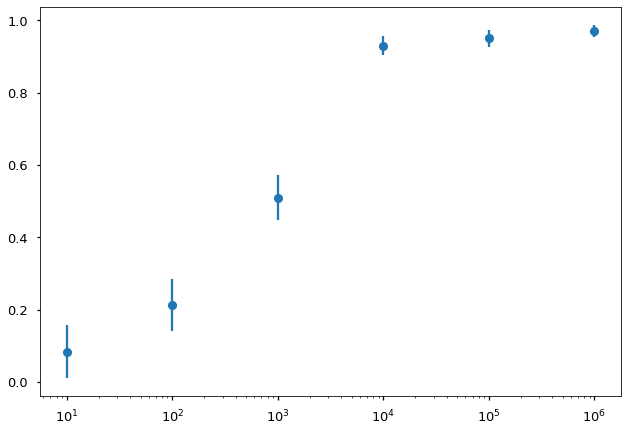

In [76]:
# load data from file again

result_directory = os.path.normpath(result_directory)
ana_file = os.path.join(result_directory, 'results', 'simulations', 'ana' + simu_name + '.data') 

with open(ana_file, 'rb') as f:
    ana_dict = pickle.load(f)
    
summary_stats_all = ana_dict['summary_stats_all']
inf_dict = ana_dict['inf_dict']
exp_dict = inf_dict['exp_dict']


ind_0 = 0
r_hJ = summary_stats_all['r_hJ'][ind_0:]
SE_r_hJ = summary_stats_all['SE_r_hJ'][ind_0:]
N_pop_list = exp_dict['N_pop']

# plot r_hJ +- SE_r_hJ
fig = plt.figure()
plt.errorbar(N_pop_list, r_hJ, SE_r_hJ, marker='o',linestyle='none',zorder=1)
plt.xscale('log')
plt.show()
plt.close()

In [69]:
# sampling and inference parameters
exp_dict = {'N_pop' : [10, 100, 10**3, 10**4, 10**5, 10**6]}

result_directory = ('C:/Users/julia/Documents/Resources/InfluenzaFitnessLandscape/NewApproachFromMarch2021/'
                    'InfluenzaFitnessInference')
simu_name = '2021Apr07'
single_simu_filename =\
'running_N_pop_1e+04N_site_20N_state_2mu_1e-04sigma_h_1D0_5h_0_-7J_0_0seed_123456N_simu_2e+02.data'
exp_idx = 3

# number of sequences sampled from surviving strains
B = 10**3 
# RNG seed for sampling
seed = 20390 
# generations to start and end inference
inf_start = 100 
inf_end = 200
# regularization coefficients for the three types of inferred parameters
# 0 means no regularization, 1 means unit variance
lambda_h = 0
lambda_J = 1
lambda_f = 0

inf_dict ={'simu_name': simu_name, 
               'exp_dict': exp_dict, 
               'seed': seed, 
               'B': B, 
               'inf_start': inf_start, 
               'inf_end': inf_end, 
               'lambda_h': lambda_h, 
               'lambda_J': lambda_J, 
               'lambda_f': lambda_f}

# # run full analysis for a single simulation:

# summary_stats = ana.single_simu_analysis(single_simu_filename, simu_name, exp_idx,
#                                          seed, B, inf_start, inf_end, lambda_h, lambda_J, lambda_f,
#                                          result_directory='C:/Users/julia/Documents/Resources/InfluenzaFitnessLandscape/'
#                                     'NewApproachFromMarch2021/InfluenzaFitnessInference')

In [17]:
strain_yearly, strain_frequency_yearly, traj2 = ana.load_simu_data(single_simu_filename, simu_name, exp_idx)

traj2.v_idx = 2
# traj2.f_add_result('summary_stats', summary_stats,
#                       comment='summary statistics')
print(traj2.N_pop)

1000


In [ ]:
strain_yearly, strain_frequency_yearly, traj =\
        ana.load_simu_data(single_simu_filename, simu_name, exp_idx, result_directory=result_directory)

# model fitness landscape
if traj.hJ_coeffs=='constant':
    h_model, J_model = simu.fitness_coeff_constant(traj.N_site, traj.N_state, traj.h_0, traj.J_0)
elif traj.hJ_coeffs=='p24':
    h_model, J_model = simu.fitness_coeff_p24(traj.N_site, traj.N_state)

In [ ]:
# strain_yearly = [strains.tolist() for strains in strain_yearly]
print(strain_yearly[0])

In [ ]:
# take random samples from each inference generation
strain_sample_yearly, strain_sample_count_yearly, strain_sample_frequency_yearly=\
    ana.sample_seqs(strain_yearly, strain_frequency_yearly, seed_sample, B, inf_end)

# calculate -F_host for each time step between inf_start and inf_end
minus_fhost_yearly = [-simu.fitness_host_list(strain_sample_yearly[t], strain_sample_yearly[:t], 
                                              strain_sample_frequency_yearly[:t], traj.sigma_h, traj.D0)
                    for t in range(inf_start, inf_end)]

# calculate F_int for each time step between inf_start and inf_end
fint_yearly = [simu.fitness_int_list(strain_sample_yearly[t], traj.N_state, h_model, J_model)
                    for t in range(inf_start, inf_end)]

# F_tot= F_int + F_host for each time step between inf_start and inf_end
ftot_yearly = [[fint_yearly[t][i] - minus_fhost_yearly[t][i] for i in range(len(minus_fhost_yearly[t]))] 
               for t in range(len(minus_fhost_yearly))]

In [ ]:
# process data for inference (calculation of feature matrix X and output matrix Y)

# calculation of features matrix X
X = ana.inference_features_Ising(strain_sample_yearly[inf_start:inf_end])

# calculation of response vector Y
Y = ana.inference_response_FhostPrediction(minus_fhost_yearly)

# inference (parameter vector M and standard error M_std of inferred params):
M, M_std = ana.infer_ridge(X, Y, lambda_h, lambda_J, lambda_f, inf_start, inf_end)

In [ ]:
# mean std of fitnesses:

f_host_std = np.mean([np.std(fs) for fs in minus_fhost_yearly])
f_int_std = np.mean([np.std(fs) for fs in fint_yearly])
f_tot_std = np.mean([np.std(fs) for fs in ftot_yearly])
stringency = np.mean([(np.std(ftot)/np.std(mfhost)) for mfhost, ftot in zip(minus_fhost_yearly, ftot_yearly)])
SE_string = np.std([(np.std(ftot)/np.std(mfhost)) for mfhost, ftot in zip(minus_fhost_yearly, ftot_yearly)])/len(ftot_yearly)
print('mean std of F_host: ', f_host_std)
print('mean std of F_int: ', f_int_std)
print('mean std of F_tot: ', f_tot_std)
print('selection stringency: ', stringency, ' standard error: ', SE_string)

In [ ]:
# compare model fitness coeffs against inferred coeffs

# model coefficients
h_model_list, J_model_list, hJ_model_list = ana.hJ_model_lists(h_model, J_model)
# inferred coefficients
h_inf_list, J_inf_list, hJ_inf_list = ana.hJ_inf_lists(M, traj.N_site)
# std of inferred coefficients
std_h_inf_list, std_J_inf_list, std_hJ_inf_list = ana.hJ_inf_std_lists(M_std, traj.N_site)

r_h, pr_h=scipy.stats.pearsonr(h_model_list, h_inf_list) # pearson correlation
print('linear correlation for h: rho=',r_h,', p=',pr_h)
r_J, pr_J=scipy.stats.pearsonr(J_model_list, J_inf_list) 
print('linear correlation for J: rho=',r_J,', p=',pr_J)
r_hJ, pr_hJ=scipy.stats.pearsonr(hJ_model_list, hJ_inf_list) 
print('linear correlation for hi+hj+Jij: rho=',r_hJ,', p=',pr_hJ)

rho_h, prho_h=scipy.stats.spearmanr(h_model_list,h_inf_list) # spearman rank correlation
print('Spearman rank correlation for h: rho=',rho_h,', p=',prho_h)
rho_J, prho_J=scipy.stats.spearmanr(J_model_list,J_inf_list) # spearman rank correlation
print('Spearman rank correlation for J: rho=',rho_J,', p=',prho_J)
rho_hJ, prho_hJ=scipy.stats.spearmanr(hJ_model_list,hJ_inf_list) # spearman rank correlation
print('Spearman rank correlation for hi+hj+Jij: rho=',rho_hJ,', p=',prho_hJ)

In [ ]:
N_site = traj.N_site

h_epi_model,J_epi_model,hJ_epi_model=hJ_redlist_fromlist(h_model, J_model, N_site, 0) # model params
h_epi_inf,J_epi_inf,hJ_epi_inf,f_inf=coeffs_inf_reduced(M,inf_start,inf_end,N_site,0) # inferred params
h_epi_std,J_epi_std,hJ_epi_std,f_std=coeffs_std_reduced(M_std,inf_start,inf_end,N_site,0)

## comparison of inferred and model coefficients in one figure with 3 panels:
fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3, constrained_layout=True)
# subplot for h comparison
x=np.linspace(-10,2,num=2)
fig=plt.figure()
ax1.errorbar(h_epi_model,h_epi_inf,h_epi_std,marker='o',linestyle='none',zorder=1)
ax1.plot(x,x,'-',color='black')
ax1.set(xlabel='model h')
ax1.set(ylabel='inferred h')
ax1.set_aspect(1/ax1.get_data_ratio())
# subplot for J comparison
x=np.linspace(-2,3,num=2)
fig=plt.figure()
ax2.errorbar(J_epi_model,J_epi_inf,J_epi_std,marker='o',linestyle='none',zorder=1)
#plt.plot(J_model[1327],M[num_h+1327],marker='o',linestyle='none',color='yellow',zorder=2)
#plt.plot(J_model[113],M[num_h+113],marker='o',linestyle='none',color='red',zorder=2)
ax2.plot(x,x,'-',color='black')
ax2.set(xlabel='model J')
ax2.set(ylabel='inferred J')
ax2.set_aspect(1/ax2.get_data_ratio())
# subplot for hi+hj+Jij comparison
x=np.linspace(-15,5,num=2)
fig=plt.figure()
ax3.errorbar(hJ_epi_model,hJ_epi_inf,hJ_epi_std,marker='o',linestyle='none',zorder=1)
ax3.plot(x,x,'-',color='black')
ax3.set(xlabel='model hi+hj+Jij')
ax3.set(ylabel='inferred hi+hj+Jij')
ax3.set_aspect(1/ax3.get_data_ratio())

# # plot for f(t):
# fig=plt.figure()
# plt.errorbar(np.arange(len(f_inf)),f_inf,f_std,marker='o',linestyle='none',zorder=1)
# plt.xlabel('inference generation')
# plt.ylabel('inferred f(t)')
# plt.show()
# plt.close()


rho, pval=scipy.stats.pearsonr(h_epi_model.flatten(),h_epi_inf) # spearman rank correlation
print('linear correlation for h: rho=',rho,', p=',pval)
rho, pval=scipy.stats.pearsonr(np.array(J_epi_model).flatten(),J_epi_inf) # spearman rank correlation
print('linear correlation for J: rho=',rho,', p=',pval)
rho, pval=scipy.stats.pearsonr(np.array(hJ_epi_model).flatten(),hJ_epi_inf) # spearman rank correlation
print('linear correlation for hi+hj+Jij: rho=',rho,', p=',pval)

print('\n')

rho, pval=scipy.stats.spearmanr(h_epi_model,h_epi_inf) # spearman rank correlation
print('Spearman rank correlation for h: rho=',rho,', p=',pval)
rho, pval=scipy.stats.spearmanr(np.array(J_epi_model).flatten(),J_epi_inf) # spearman rank correlation
print('Spearman rank correlation for J: rho=',rho,', p=',pval)
rho, pval=scipy.stats.spearmanr(np.array(hJ_epi_model).flatten(),hJ_epi_inf) # spearman rank correlation
print('Spearman rank correlation for hi+hj+Jij: rho=',rho,', p=',pval)

In [ ]:
# plot the data and fitnesses 
cm = plt.get_cmap('rainbow')
colorlist=list(cm(1.*i/(len(minus_fhost_yearly))) for i in range(len(minus_fhost_yearly)))

# -F_host
figure=plt.figure()
for t in range(len(minus_fhost_yearly)):
    plt.plot([t]*len(minus_fhost_yearly[t]), minus_fhost_yearly[t],'.',color=colorlist[t])
plt.xlabel('time step t')
plt.ylabel('-F_host(S,t)')
#plt.ylim([-10,60])
plt.show()
plt.close()

# F_int
figure=plt.figure()
for t in range(len(fint_yearly)):
    plt.plot([t]*len(fint_yearly[t]), fint_yearly[t],'.',color=colorlist[t])
plt.xlabel('time step t')
plt.ylabel('F_int(S,t)')
#plt.ylim([-10,60])
plt.show()
plt.close()

ftot_yearly = [[fint_yearly[t][i] - minus_fhost_yearly[t][i] for i in range(len(minus_fhost_yearly[t]))] 
               for t in range(len(minus_fhost_yearly))]
# F_tot
figure=plt.figure()
for t in range(len(fint_yearly)):
    plt.plot([t]*len(ftot_yearly[t]), ftot_yearly[t],'.',color=colorlist[t])
plt.xlabel('time step t')
plt.ylabel('F_int(S,t)')
#plt.ylim([-10,60])
plt.show()
plt.close()

# mean std of fitnesses:
f_host_std = np.mean([np.std(fs) for fs in minus_fhost_yearly])
f_int_std = np.mean([np.std(fs) for fs in fint_yearly])
f_tot_std = np.mean([np.std(fs) for fs in ftot_yearly])
print('mean std of F_host: ', f_host_std)
print('mean std of F_int: ', f_int_std)
print('mean std of F_tot: ', f_tot_std)